### Stock Market Prediction And Forecasting Using Stacked LSTM

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df=pd.read_csv('apple_20.csv')

In [13]:
df.head()

,date,open,high,low,close,volume
0,12-12-1980,0.0986,0.0991,0.0986,0.0986,1609186
1,15-12-1980,0.0939,0.0939,0.0935,0.0935,603256
2,16-12-1980,0.0871,0.0871,0.0866,0.0866,362690
3,17-12-1980,0.0887,0.0892,0.0887,0.0887,296358
4,18-12-1980,0.0914,0.0918,0.0914,0.0914,252061


In [14]:
df.tail()

,date,open,high,low,close,volume
11224,26-06-2025,201.430,202.640,199.46,201.00,50799100
11225,27-06-2025,201.890,203.220,200.00,201.08,73188600
11226,30-06-2025,202.010,207.390,199.26,205.17,91912800
11227,01-07-2025,206.665,210.186,206.14,207.82,77921627
11228,02-07-2025,208.910,213.340,208.14,212.27,66752918


In [15]:
df1=df.reset_index()['close']

In [16]:
df1

0          0.0986
1          0.0935
2          0.0866
3          0.0887
4          0.0914
           ...   
11224    201.0000
11225    201.0800
11226    205.1700
11227    207.8200
11228    212.2700
Name: close, Length: 11229, dtype: float64

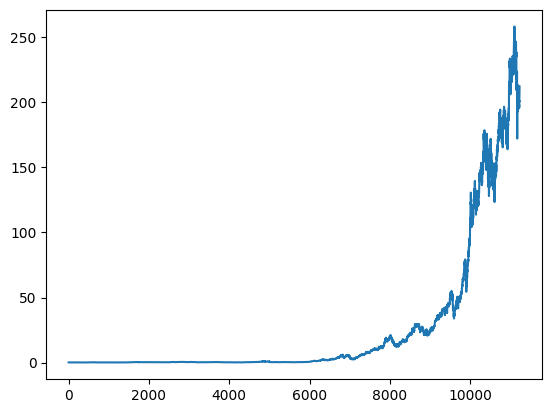

In [17]:
plt.plot(df1)

In [18]:
df1

0          0.0986
1          0.0935
2          0.0866
3          0.0887
4          0.0914
           ...   
11224    201.0000
11225    201.0800
11226    205.1700
11227    207.8200
11228    212.2700
Name: close, Length: 11229, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [417]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.90)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(10106, 1123)

In [27]:
train_data

array([[2.35718242e-04],
       [2.15978291e-04],
       [1.89271298e-04],
       ...,
       [4.94177295e-01],
       [4.98442673e-01],
       [4.86850289e-01]])

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [49]:
print(X_train), print(y_train.shape)

[[[2.35718242e-04]
  [2.15978291e-04]
  [1.89271298e-04]
  ...
  [2.29138258e-04]
  [2.27590027e-04]
  [2.17526522e-04]]

 [[2.15978291e-04]
  [1.89271298e-04]
  [1.97399513e-04]
  ...
  [2.27590027e-04]
  [2.17526522e-04]
  [2.22558274e-04]]

 [[1.89271298e-04]
  [1.97399513e-04]
  [2.07850075e-04]
  ...
  [2.17526522e-04]
  [2.22558274e-04]
  [2.25654737e-04]]

 ...

 [[4.33355021e-01]
  [4.32967964e-01]
  [4.31837755e-01]
  ...
  [5.00857914e-01]
  [4.88475933e-01]
  [4.94514035e-01]]

 [[4.32967964e-01]
  [4.31837755e-01]
  [4.35437393e-01]
  ...
  [4.88475933e-01]
  [4.94514035e-01]
  [4.77862806e-01]]

 [[4.31837755e-01]
  [4.35437393e-01]
  [4.35983144e-01]
  ...
  [4.94514035e-01]
  [4.77862806e-01]
  [4.94177295e-01]]]
(10005,)


(None, None)

In [34]:
print(X_test.shape), print(ytest.shape)

(1022, 100)
(1022,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\vedan\ml\ml\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 1.6966e-05 - val_loss: 8.6973e-04
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 1.5770e-05 - val_loss: 7.4764e-04
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 1.8330e-05 - val_loss: 0.0012
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 1.4456e-05 - val_loss: 5.6738e-04
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 1.2441e-05 - val_loss: 5.1556e-04
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 1.4217e-05 - val_loss: 4.6283e-04
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - loss: 1.6125e-05 - val_loss: 6.9296e-04
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - loss: 1.2140e-05 - val_loss: 0.0020
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - loss: 1.3219e-05 - val_loss: 6.7086e-04
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - loss: 1.4851e-05 - val_loss: 7.9330e-04
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 149

In [50]:
import tensorflow as tf

In [51]:
tf.__version__

'2.19.0'

In [52]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [53]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [54]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.280075074178864

In [55]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

179.54377909537803

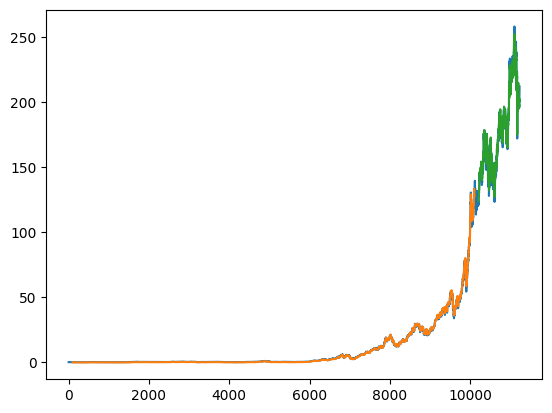

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
len(test_data)

1123

In [63]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 782)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [65]:
temp_input

[0.5230827765828442,
 0.5239962331528224,
 0.5450250871557555,
 0.5345513012304957,
 0.5351589820842524,
 0.5475796690887458,
 0.5699012963729193,
 0.5668551509467629,
 0.5663597168749102,
 0.5758813404433283,
 0.5536758305197452,
 0.556571023377134,
 0.5663597168749102,
 0.5635032298043848,
 0.5432368798026624,
 0.5222467315865927,
 0.5022474515142284,
 0.5055993726566065,
 0.5157712534443312,
 0.4953113745082913,
 0.5010282192280285,
 0.5174472140155202,
 0.5154654777281096,
 0.5265895208726761,
 0.5395017713703358,
 0.5395017713703358,
 0.5234272580859292,
 0.5302472177312758,
 0.5206830177973079,
 0.5291015264401164,
 0.5391224546590736,
 0.5443012889414084,
 0.5573683625865219,
 0.5599964855145527,
 0.551732800019198,
 0.5555027436597018,
 0.5540938530178708,
 0.565446260304932,
 0.5719217384471935,
 0.5601126028751432,
 0.5750840012339405,
 0.5828561232361289,
 0.5916539485901997,
 0.5868544310191273,
 0.5825116417330438,
 0.5773676426588862,
 0.597138558588756,
 0.59927124744493

In [66]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input) > n_steps):
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        print(len(temp_input))
        lst_output.append(yhat[0][0])
        i += 1
    

print(lst_output)

0 day input [0.87879283 0.87983788 0.89904757 0.91547817 0.93349185 0.94535904
 0.94485587 0.94640023 0.95011211 0.94902835 0.95502001 0.95479164
 0.92896714 0.91713865 0.93468786 0.9199603  0.9118437  0.91110829
 0.90952522 0.92398183 0.87917989 0.85351408 0.838593   0.81037261
 0.82510016 0.82707416 0.82200757 0.83186593 0.82746121 0.8435783
 0.85308832 0.86476198 0.85618091 0.86514904 0.84215006 0.85849938
 0.86259833 0.86530386 0.78528739 0.72803766 0.70128809 0.66634451
 0.7685123  0.7359259  0.76580677 0.78269797 0.78122715 0.75080827
 0.76128206 0.7465158  0.77194937 0.79073716 0.80530989 0.80882825
 0.81215308 0.81628685 0.82127603 0.82444603 0.79363623 0.76866712
 0.7671963  0.75846041 0.76325218 0.76727372 0.81573336 0.8240164
 0.82169405 0.81828794 0.81755253 0.8079535  0.80052199 0.78205933
 0.7792338  0.75566198 0.77478264 0.77559546 0.77377629 0.77725981
 0.7805498  0.78662661 0.78488485 0.77640828 0.78914248 0.77958216
 0.78430426 0.76924771 0.77087335 0.76022926 0.76785

In [76]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [77]:
print(df1.size)

11229


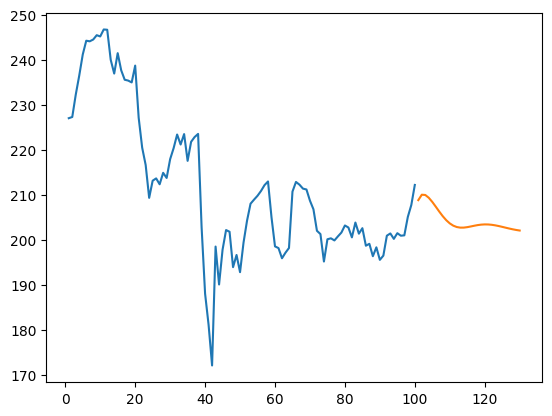

In [81]:
plt.plot(day_new,scaler.inverse_transform(df1[11129:]))
plt.plot(day_pred, scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)))

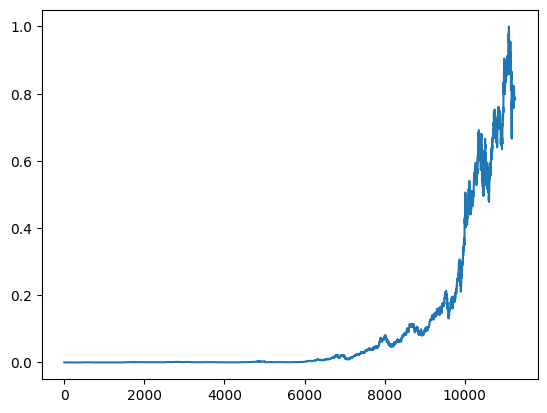

In [83]:
df3 = df1.flatten().tolist()
df3.extend(lst_output)
plt.plot(df3)

In [86]:
df3 = scaler.inverse_transform(np.array(df3).reshape(-1, 1)).tolist()

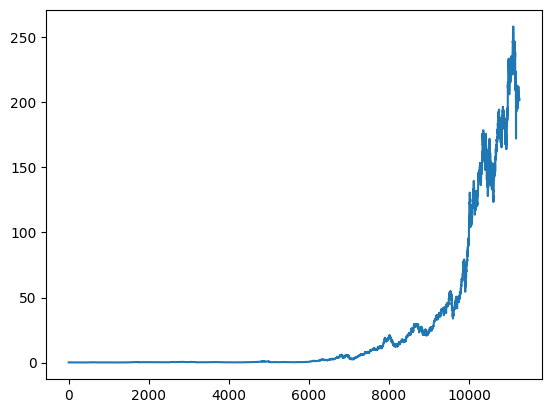

In [87]:
plt.plot(df3)

In [ ]:
# accuracy check
# Buy/sell signal for next 10 predicted days
for i in range(1, 11):
    idx_actual = -len(lst_output)-1 + i
    idx_pred = -len(lst_output)-1 + i
    actual = df3[idx_actual][0] if isinstance(df3[idx_actual], list) else df3[idx_actual]
    predicted = df3[idx_actual + len(lst_output)][0] if isinstance(df3[idx_actual + len(lst_output)], list) else df3[idx_actual + len(lst_output)]
    if predicted > actual:
        print(f"Day {i}: Predicted price ({predicted:.2f}) is higher than actual price ({actual:.2f}). Suggest: BUY.")
    else:
        print(f"Day {i}: Predicted price ({predicted:.2f}) is not higher than actual price ({actual:.2f}). Suggest: DO NOT BUY.")

Predicted price (202.15) is not higher than last actual price (212.27). Suggest: DO NOT BUY.
